# Importando las librerías y funciones básicas

In [1]:
#Librería de graficación
import matplotlib.pyplot as plt
import matplotlib as mp
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.gridspec as gsa
import matplotlib.ticker as mticker
from mpl_toolkits.basemap import Basemap


#Librerías de procesamiento matemático y lectura de archivos
import numpy as np
import netCDF4 as nc
import pandas as pd
import glob
import os


#Librería de estadística
import scipy as sp

#librería para manejo de fechas
from datetime import datetime,timedelta


# from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use("seaborn")
mp.rcParams['font.size'] = 18

In [2]:
def reading_netcdf(ruta):
    data=nc.Dataset(ruta)
    for i in data.variables:
        try:
            print (i,data.variables[i].shape,data.variables[i].units) 
        except:
            print (i,data.variables[i].shape) 
    print("\n")
    data_variables=[np.array(data[i][:]) for i in list(data.variables.keys())]
    return data_variables

# Limpieza y exploración de los datos

In [3]:
rutas = np.sort(glob.glob("../Dataset/CMEMS_ECMFW/*.nc"))

#Al estar por años se debe concatenar
for i in range(0,len(rutas)):
    if i==0:
        [adt,time,lat,lon,ugos,vgos,vgosa,sla,ugosa]=reading_netcdf(rutas[i])
    else:
        [adt,time2,lat,lon,ugos,vgos,vgosa,sla2,ugosa]=reading_netcdf(rutas[i])
        sla=np.concatenate((sla,sla2))
        time=np.concatenate((time,time2))


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (367, 45, 185) m
time (367,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (367, 45, 185) m/s
vgos (367, 45, 185) m/s
vgosa (367, 45, 185) m/s
sla (367, 45, 185) m
ugosa (367, 45, 185) m/s


adt (366, 45, 185) m
tim

In [4]:
sla[sla<=-1000]=np.nan

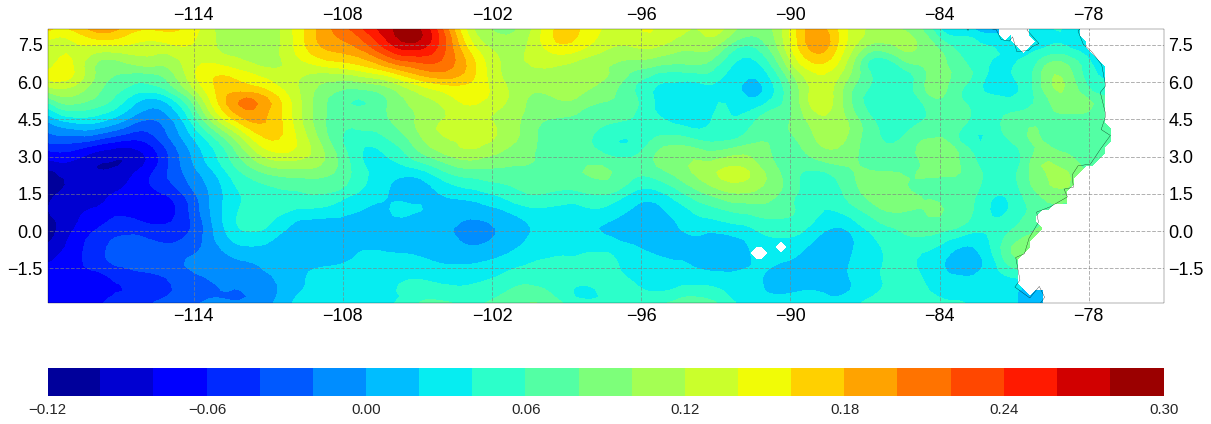

In [5]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon,lat)
cf=ax.contourf(x,y,sla[2000,:,:],20,transform=ccrs.PlateCarree(),cmap="jet")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.6, linestyle='--')
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
ax.coastlines()
cbar=plt.colorbar(cf,orientation="horizontal",fraction=0.1, pad=0.06,aspect=40)
cbar.ax.tick_params(labelsize=15) 

plt.show()

In [6]:
serie=np.nanmean(sla,axis=1)
serie_temp=np.nanmean(serie,axis=1)

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [7]:
da=[datetime(1950,1,1,0,0,0)+timedelta(days=int(time[w])) for w in range (0,len(time))]
date=pd.DatetimeIndex(da)

In [8]:
serie_sla=pd.Series(serie_temp,date)

# Graficando un diagrama de Hovmoller

Un diagrama de Hovmoller permite conocer la variación temporal de una variable integrada en las latitudes o en las latitudes.

In [9]:
new_array = np.array(date.to_pydatetime(), dtype=object)

In [10]:
sla_copy=sla

Se realiza el filtrado de la información con un suaveizado anual para solo captar variaciones interanuales

In [19]:
for la in range (sla_copy.shape[1]):
    for lo in range(sla_copy.shape[2]):
        a=sla_copy[:,la,lo]
        serie_test=pd.Series(a,index=date)
        serie_rolling=serie_test.rolling(366).mean()
#         serie_rolling=serie_rolling
        sla_copy[:,la,lo]=serie_rolling.values

## Hovmoller con las longitudes

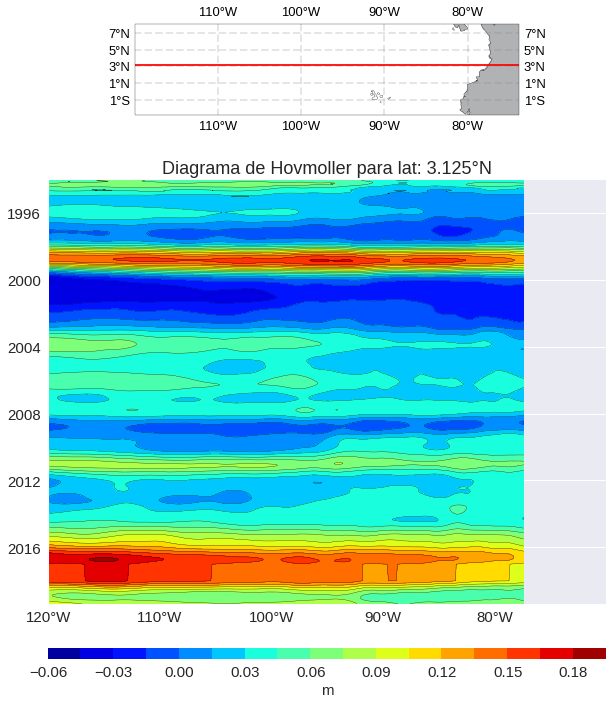

In [62]:
fig=plt.figure(figsize=(10,13))

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6],hspace=0.2)

x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
                 u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
                 u'80\N{DEGREE SIGN}W']

y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
                 u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
                 u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax1.set_extent([lon[0], lon[-1], lat[0],lat[-1]], ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.add_feature(cartopy.feature.LAND, zorder=0,facecolor='#B1B2B4')
ax1.plot([lon[0],lon[-1]],[lat[24],lat[24]],color='red',transform=ccrs.PlateCarree())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.2, linestyle='--',
                   xlocs=xlocs,ylocs=ylocs)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
gl.ylabel_style = {'size': 13, 'color': 'black'}

# plt.title('CMEMS Reanalysis',y=1.3, loc='right',fontsize=18)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller para lat: '+str(lat[24])+"°N",fontsize=18)

x,y=np.meshgrid(lon,new_array)
cf=ax2.contourf(x,y,sla_copy[:,24,:],20,cmap="jet")
cr=ax2.contour(x,y,sla[:,24,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[-1],new_array[365]))

ax2.tick_params(labelsize=15)

## Hovmoller con las latitudes

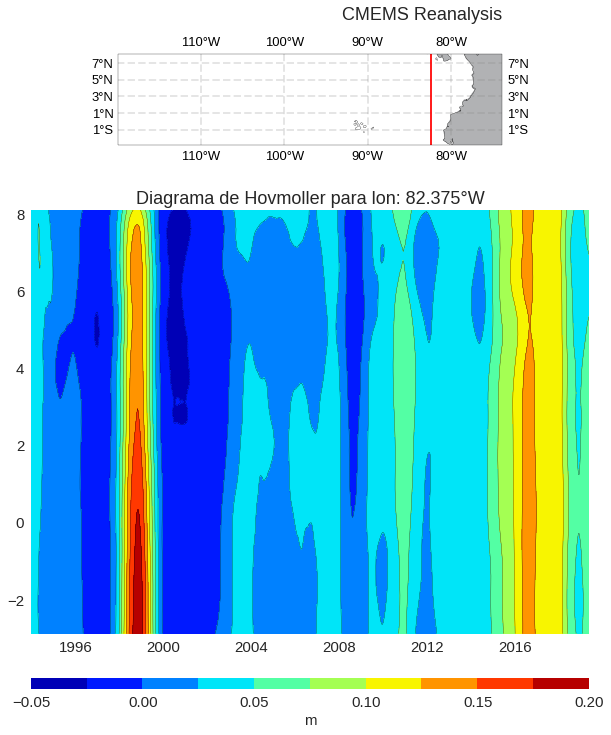

In [61]:
fig=plt.figure(figsize=(10,13))

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6],hspace=0.2)

x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
                 u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
                 u'80\N{DEGREE SIGN}W']

y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
                 u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
                 u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del primer subplot
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax1.set_extent([lon[0], lon[-1], lat[0],lat[-1]], ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.add_feature(cartopy.feature.LAND, zorder=0,facecolor='#B1B2B4')
ax1.plot([lon[150],lon[150]],[lat[0],lat[-1]],color='red',transform=ccrs.PlateCarree())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.2, linestyle='--',
                   xlocs=xlocs,ylocs=ylocs)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
gl.ylabel_style = {'size': 13, 'color': 'black'}

# plt.title('CMEMS Reanalysis',y=1.3, loc='right',fontsize=18)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Diagrama de Hovmoller para lon: '+str(360-lon[150])+"°W",fontsize=18)

x,y=np.meshgrid(new_array,lat)
cf=ax2.contourf(x,y,sla[:,:,150].T,10,cmap="jet")
cr=ax2.contour(x,y,sla[:,:,150].T,10,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

# ax2.set_xticks(np.array(xlocs)+360)
# ax2.set_xticklabels(x_tick_labels)
ax2.set_xlim((new_array[365],new_array[-1]))

ax2.tick_params(labelsize=15)